#Bank Marketing Campaign Analysis

###The objective of this analysis is to see which customers should the bank target for their new schemes like term deposit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Importing modules for classification

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!ls /content/gdrive

MyDrive  Shareddrives


In [ ]:
df= pd.read_csv('/content/gdrive/MyDrive/datasets/Bank Campaign Data.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* The average age is 41, most people are less than 50 years old
* Avg balance is 1400
* Average call duration is 260 seconds
* Maximum call duration was around 50 mins
* Maximum number of phone calls was 3

In [ ]:
# Including Categorical Features
df.describe(include=["O"])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922




* There are 12 job types, the blue-collar takes the most of them
* Over 50% of the customers are married which means that the campaign targets families.
* Most of the customers reached secondary school education
* Most of the customers have not defaulted
* Most of the customers have housing loan
* Most of the customers don't have personal loan
* Most calls was made in may



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
cat_cols= df.select_dtypes(include=['object'])
for col in cat_cols:
  print(col)
  print(cat_cols[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
y
['no' 'yes']


In [ ]:
for col in cat_cols:
  print("value counts in column",col )
  print(cat_cols[col].value_counts())

value counts in column job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
value counts in column marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
value counts in column education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
value counts in column default
no     44396
yes      815
Name: default, dtype: int64
value counts in column housing
yes    25130
no     20081
Name: housing, dtype: int64
value counts in column loan
no     37967
yes     7244
Name: loan, dtype: int64
value counts in column month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214

In [ ]:
df[df == 'unknown'].count()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [ ]:
#Dropping columns with max unknown values
df.drop(['poutcome', 'contact'], axis=1,inplace=True)

In [ ]:
#Updating missing values of education using job
b= df[['education','job']]
b2 = b[b['education'] == 'tertiary']
m2 = b2['job'].mode()[0]
print(m2)
b3 = b[b['education'] == 'secondary']
m3 = b3['job'].mode()[0]
print(m3)
b4 = b[b['education'] == 'primary']
m4 = b4['job'].mode()[0]
print(m4)

management
blue-collar
blue-collar


In [ ]:
b2.value_counts()

education  job          
tertiary   management       7801
           technician       1968
           self-employed     833
           entrepreneur      686
           admin.            572
           retired           366
           unemployed        289
           student           223
           services          202
           housemaid         173
           blue-collar       149
           unknown            39
dtype: int64

In [ ]:
b3.value_counts()

education  job          
secondary  blue-collar      5371
           technician       5229
           admin.           4219
           services         3457
           management       1121
           retired           984
           unemployed        728
           self-employed     577
           entrepreneur      542
           student           508
           housemaid         395
           unknown            71
dtype: int64

In [ ]:
b4.value_counts()

education  job          
primary    blue-collar      3758
           retired           795
           housemaid         627
           services          345
           management        294
           unemployed        257
           admin.            209
           entrepreneur      183
           technician        158
           self-employed     130
           unknown            51
           student            44
dtype: int64

In [ ]:
for i,dat in df.iterrows():
  if dat['job']== 'management' and dat['education']=='unknown':
    df.at[i,'education']= 'tertiary'

for i,dat in df.iterrows():
  if (dat['job']== 'blue-collar' or dat['job']== 'housemaid' or dat['job']== 'retired') and dat['education']=='unknown':
    df.at[i,'education']= 'primary'

for i,dat in df.iterrows():
  if dat['job'] != 'unemployed' and dat['job'] != 'self-employed' and dat['education']=='unknown':
    df.at[i,'education']= 'secondary'

for i,dat in df.iterrows():
  if dat['job']== 'self-employed' and dat['education']=='unknown':
    df.at[i,'education']= 'tertiary'

for i,dat in df.iterrows():
  if dat['job']== 'unemployed' and dat['education']=='unknown':
    df.at[i,'education']= np.random.choice(['primary','secondary','tertiary'])

In [ ]:
#Dropping unknown value entries from job column 
df.drop(df[df['job']=='unknown'].index, inplace=True)

In [ ]:
df[df == 'unknown'].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [ ]:
num_cols= df.select_dtypes(include='int64')

In [ ]:
#Dealing with the outliers in Balance

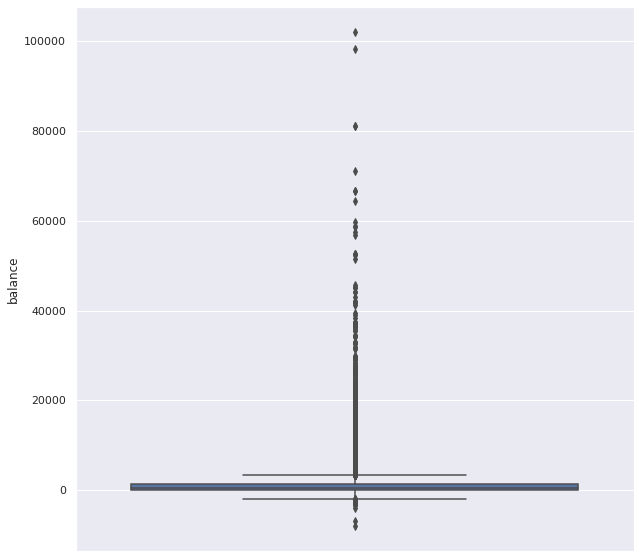

In [ ]:
sns.boxplot(y=df['balance'])

In [ ]:
# Removing outliers based on zscore > 3 or zscore < -3
from scipy.stats import zscore

df['balance_outliers'] = df['balance']
df['balance_outliers']= zscore(df['balance_outliers']) #Creating an extra column with z scores and eliminating rows based on that

condition = (df['balance_outliers']>3) | (df['balance_outliers']<-3 )
df = df.drop(df[condition].index, axis = 0)

In [ ]:
def countplot(label, dataset):
    plt.figure(figsize=(15,10))
    Y = dataset[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

   
    plt.show()
    
def countplot_hue(label, dataset):
    plt.figure(figsize=(15,10))
    Y = dataset[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue='y')
    for p in ax.patches:
        
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    
    plt.show()

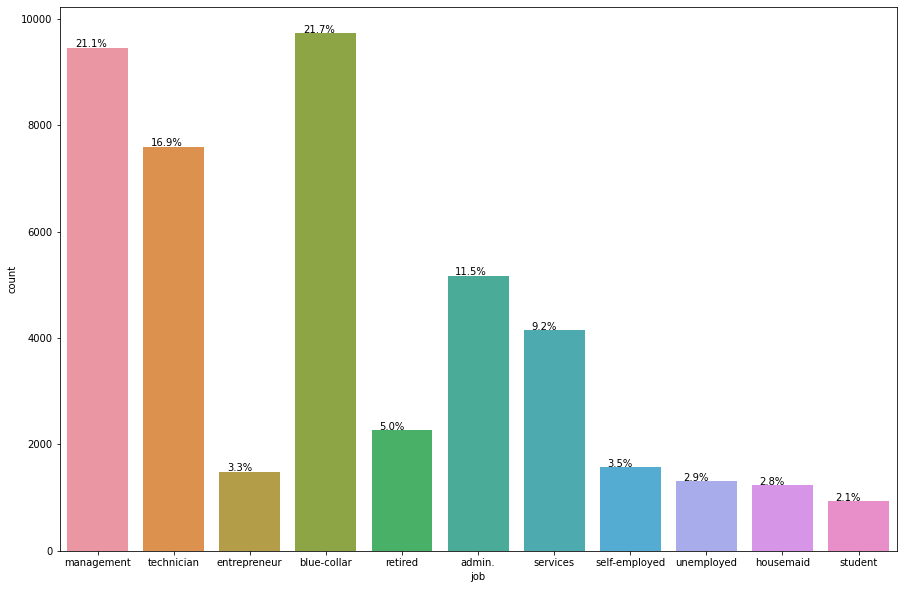

In [ ]:
countplot('job', df)

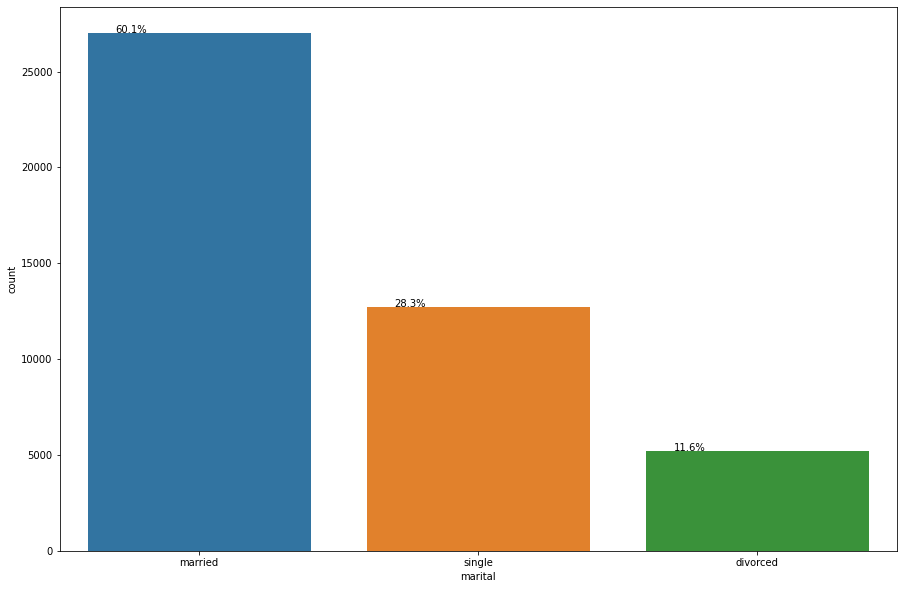

In [ ]:
countplot('marital',df)

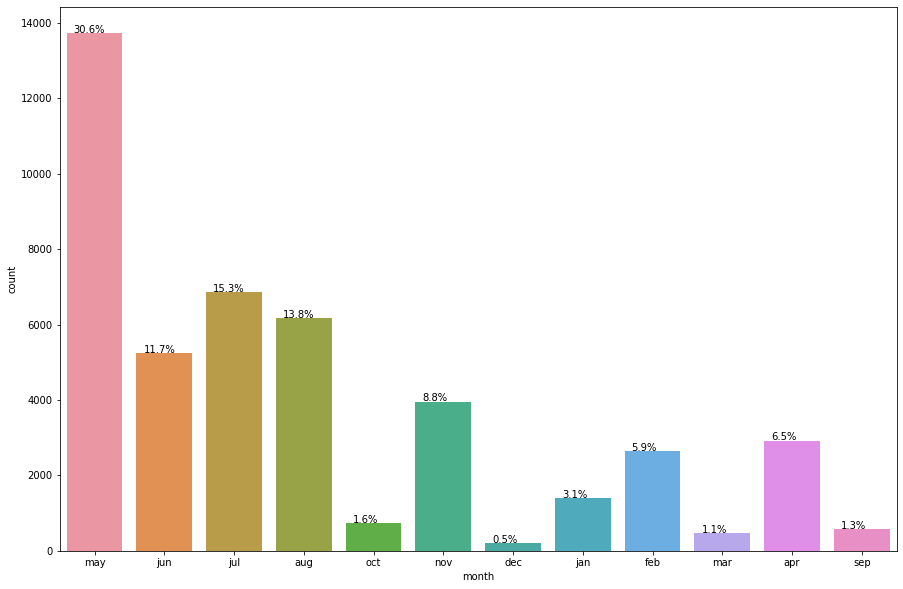

In [ ]:
countplot('month',df)

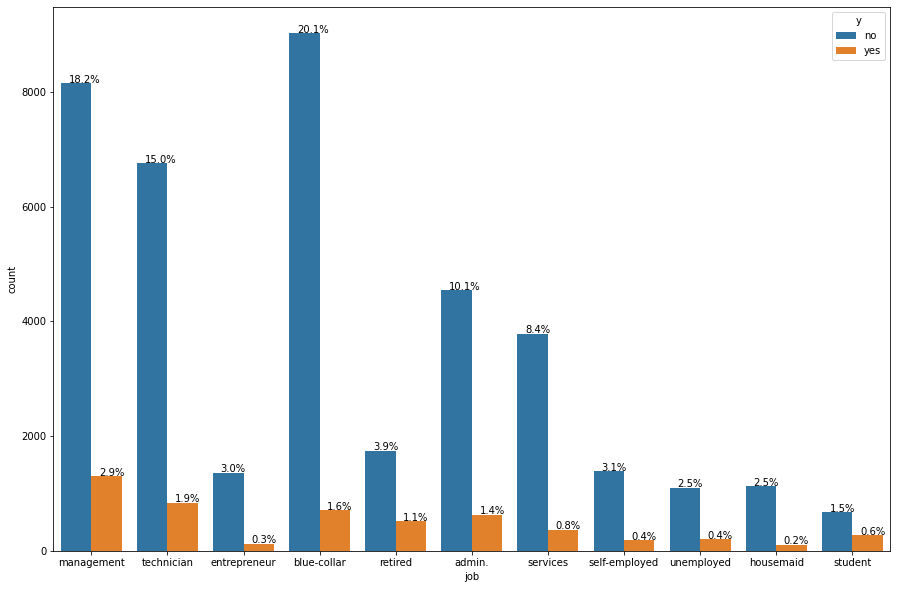

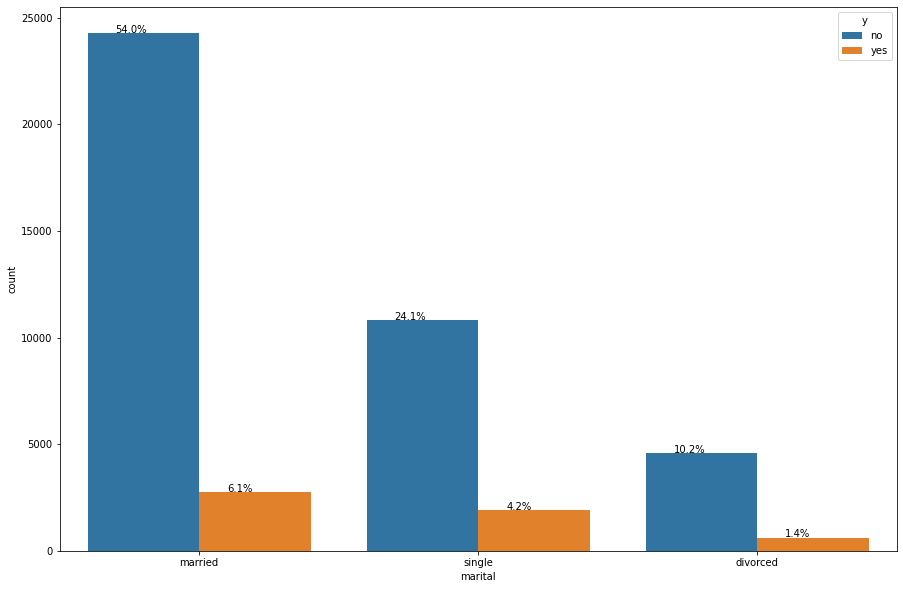

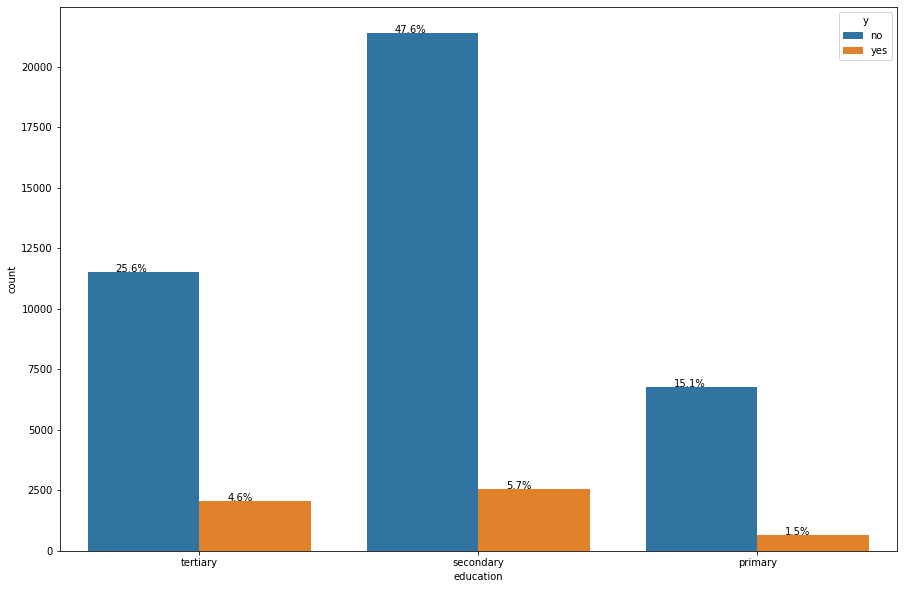

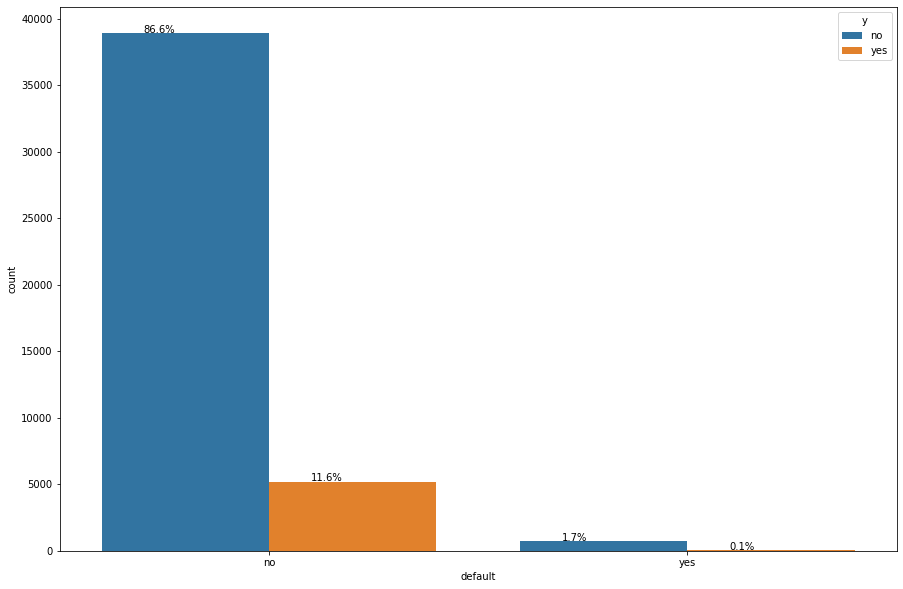

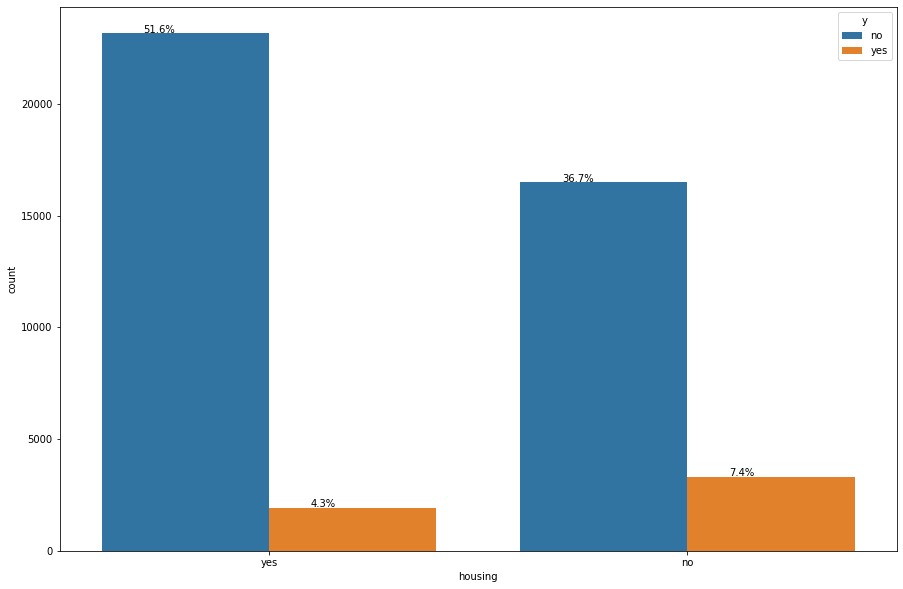

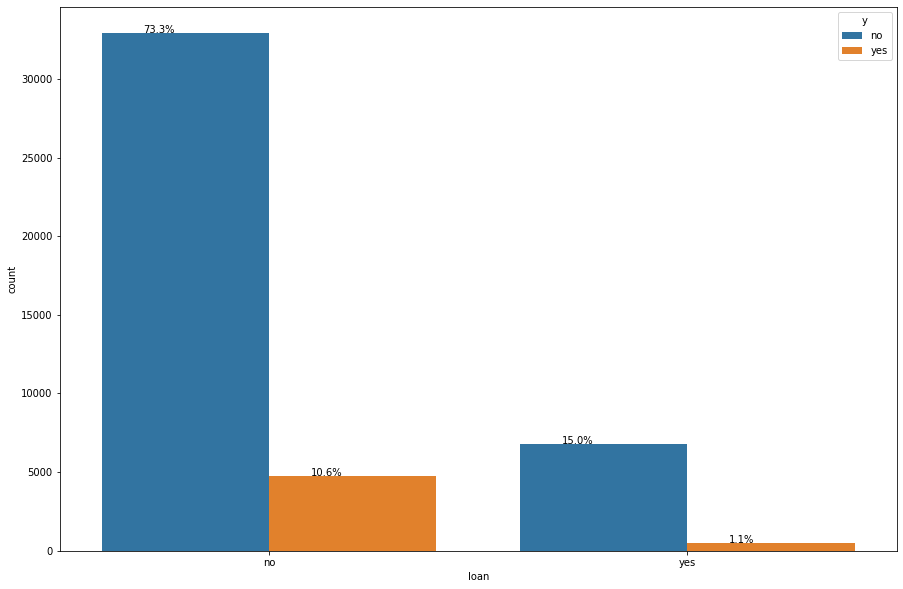

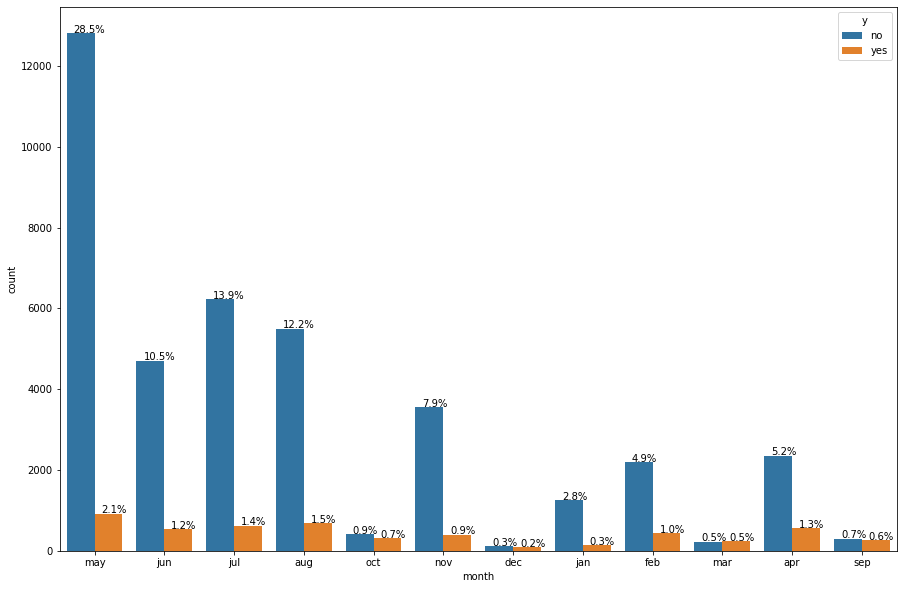

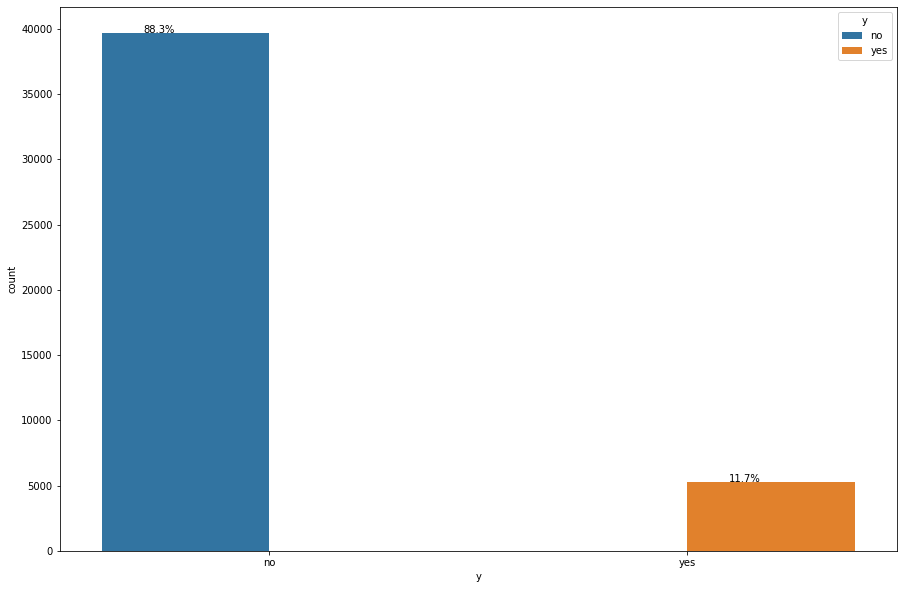

In [ ]:
for i in cat_cols:
    countplot_hue(i,df)
    plt.show()

#### Management, retire, self-employed, unemployed and students tend to subscribe more 
#### Singles subscribe more than married and divorced
#### Customers with tertiary level of education will subscribe
#### Customers with without housing and personal load tend to subscribe to term deposit
#### Customers who were approached by cellular communication have subscribed more
#### Subscription rate is more during start(jan,feb,march,apr) and end of the year(oct,sept,dec)
#### Customers who subscribed during previous campaign tend to subscribe more

<Figure size 1152x288 with 0 Axes>

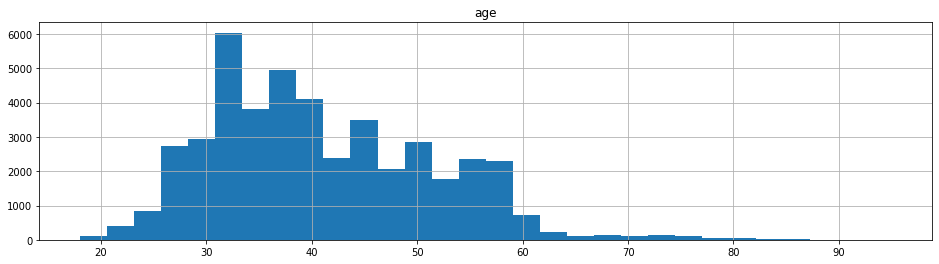

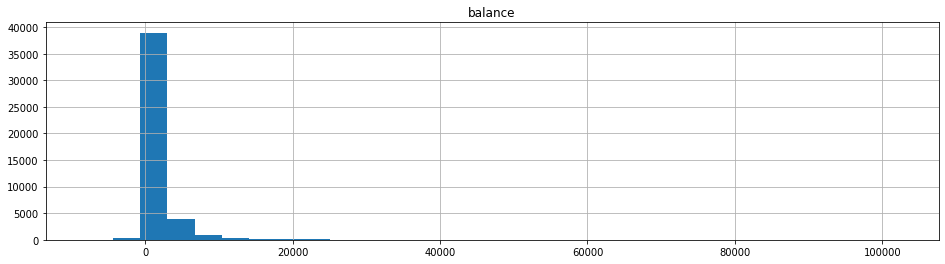

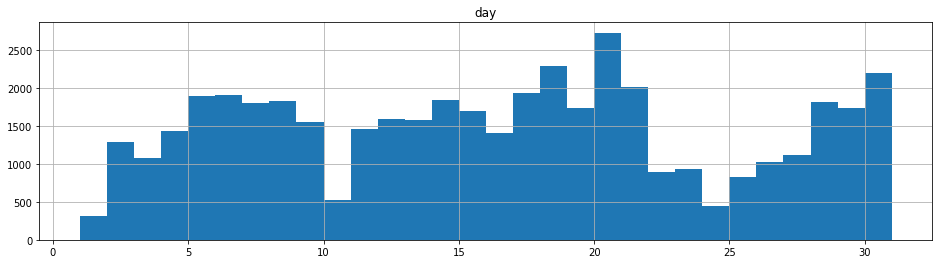

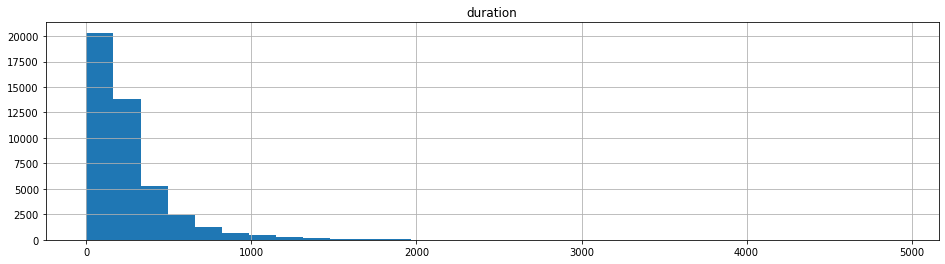

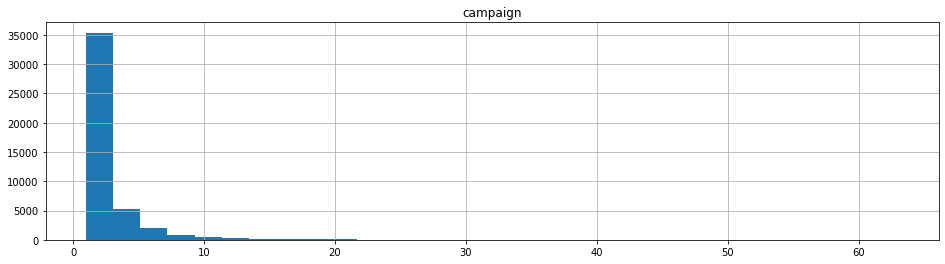

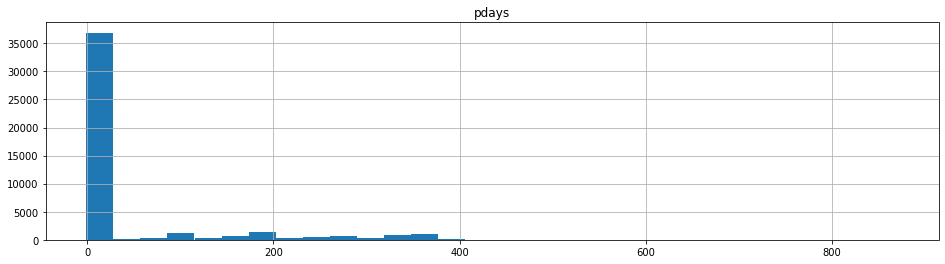

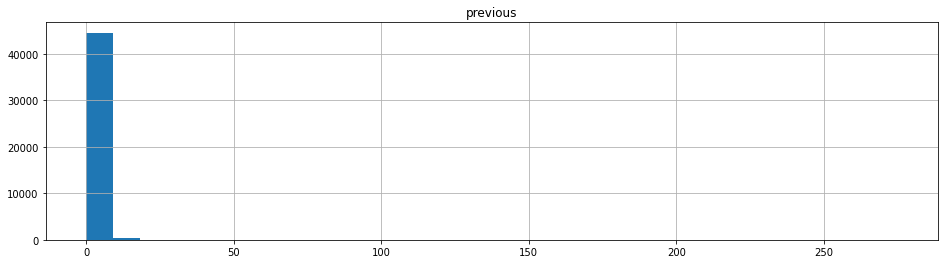

In [ ]:
#EDA ON NUMERICAL FEATURES
# Adjust Figure size
plt.figure(figsize=(16,4))
# Iterating throw numerical features
for feature in df.columns:
    if df[feature].dtype == "O":
        pass
    else:
        plt.figure(figsize=(16,4))
        # Plotting Histograms
        df[feature].hist(bins=30)
        plt.title(feature)
        plt.show()

Text(0.5, 1.0, 'Violin Plot of Balance by subscription')

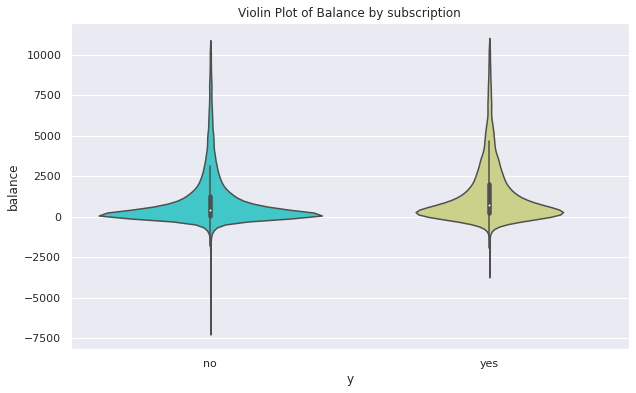

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='y',y="balance",data=df,palette='rainbow')
plt.title("Violin Plot of Balance by subscription")

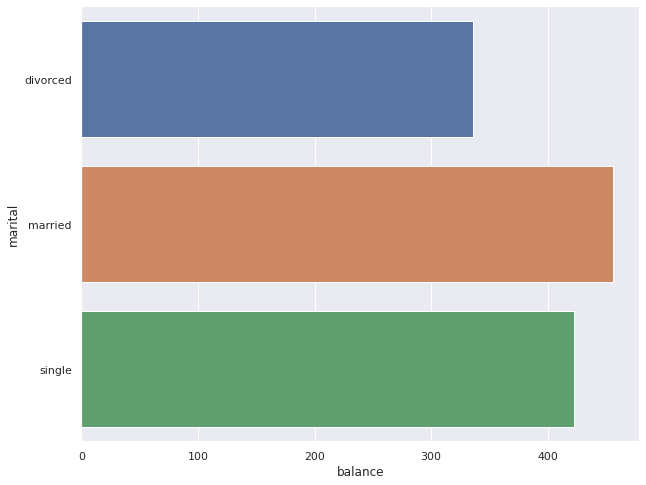

In [ ]:
#Since high balance means high chances of term deposit, we check other variables relationship with balance
#How marriage affects balance
import seaborn as sns
marital_groups = df.groupby(['marital'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(10,8))
sns.barplot(x="balance", y="marital", data=marital_groups)

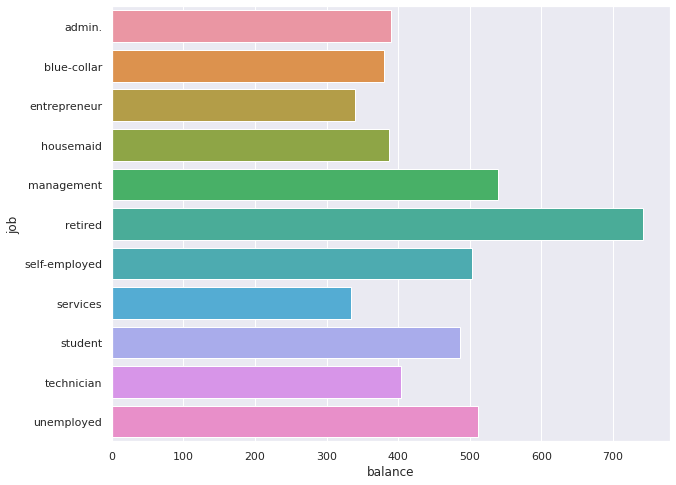

In [ ]:
education_groups = df.groupby(['job'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(10,8))
sns.barplot(x="balance", y="job", data=education_groups)

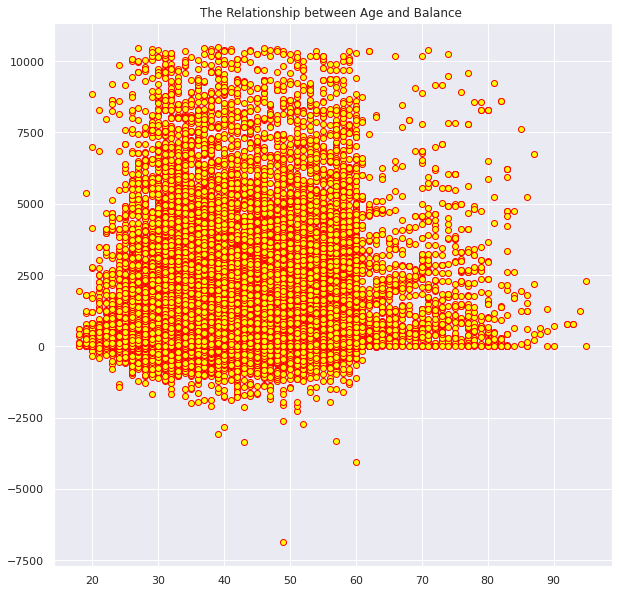

In [ ]:
# Visulizing relationship between age and balance

plt.figsize = (7,5)
plt.scatter(df['age'],df['balance'],c='yellow',edgecolor='red')
plt.grid(True)

plt.title('The Relationship between Age and Balance ')
plt.show()

The plot shows that there is no clear relationship between age and balance. However, we may note that customers above 60 years tend to have a balance <5000.

In [ ]:
target_map = {'yes': 1, 'no': 0}
df['y'] = df['y'].map(target_map)

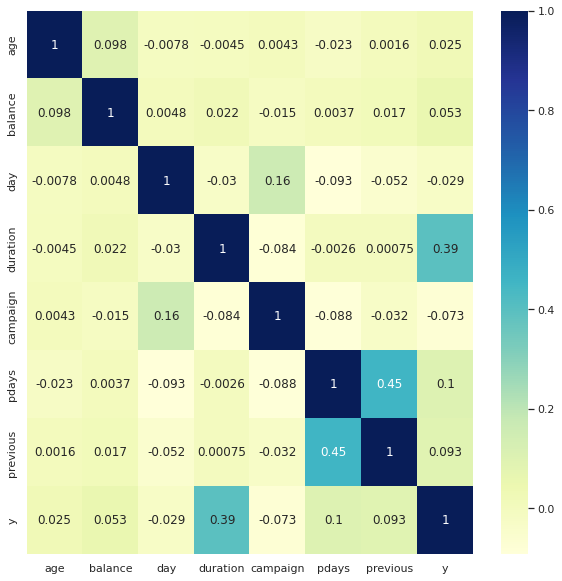

In [ ]:
# Plotting the heatmap for the variables

sns.set(rc={"figure.figsize":(10, 10)})
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

From the heatmap of the variables, it is evident that only duration has a significant correlation with response.

In [ ]:
#Label Encoding the binary categorical data
le =LabelEncoder()

default=le.fit_transform(df['default'])
housing=le.fit_transform(df['housing'])
loan=le.fit_transform(df['loan'])

df['default']=default
df['housing']=housing
df['loan']=loan

df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,balance_outliers
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,0,0.257255
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,0,-0.436985
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,0,-0.445851
3,47,blue-collar,married,primary,0,1506,1,0,5,may,92,1,-1,0,0,0.048064
5,35,management,married,tertiary,0,231,1,0,5,may,139,1,-1,0,0,-0.370648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,17,nov,977,3,-1,0,1,-0.175577
45207,71,retired,divorced,primary,0,1729,0,0,17,nov,456,2,-1,0,1,0.121297
45208,72,retired,married,secondary,0,5715,0,0,17,nov,1127,5,184,3,1,1.430304
45209,57,blue-collar,married,secondary,0,668,0,0,17,nov,508,4,-1,0,0,-0.227136


In [ ]:
#Creating dummy columns for other variables
df = pd.get_dummies(df)
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
5,35,0,231,1,0,5,139,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Selecting first 20 columns as features
X = df.drop(['y','balance_outliers'], axis=1)

# Selecting 'response' column as output
Y = df['y']

In [ ]:
# Splitting the data 80:20
m= 0.20
seed = 10
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=m, random_state=seed)

In [ ]:
#Min Max Scaling
sc=MinMaxScaler()

X_train=pd.DataFrame(sc.fit_transform(X_train))
X_test=pd.DataFrame(sc.transform(X_test))

In [ ]:
X

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
5,35,0,231,1,0,5,139,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Since the data is imbalanced, we will apply SMOTE to oversample the training data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_os, y_train_os = sm.fit_resample(X_train, y_train.ravel())

print("No. of 1s before oversampling : {}".format(sum(y_train==1)))
print("No. of 0s before oversampling : {}".format(sum(y_train==0)))
print(" ")
print("No. of 1s after oversampling: {}".format(sum(y_train_os==1)))
print("No. of 0s after oversampling: {}".format(sum(y_train_os==0)))

No. of 1s before oversampling : 4101
No. of 0s before oversampling : 31247
 
No. of 1s after oversampling: 31247
No. of 0s after oversampling: 31247


In [ ]:
# Creating a list of models to find the best
models = []
models.append(('LR', LogisticRegression(max_iter= 200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
#CROSS VALIDATION SCORES 
# Fitting the data on the training set
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.892582 (0.005426)
KNN: 0.882341 (0.005988)
CART: 0.871393 (0.005389)
NB: 0.862001 (0.007711)


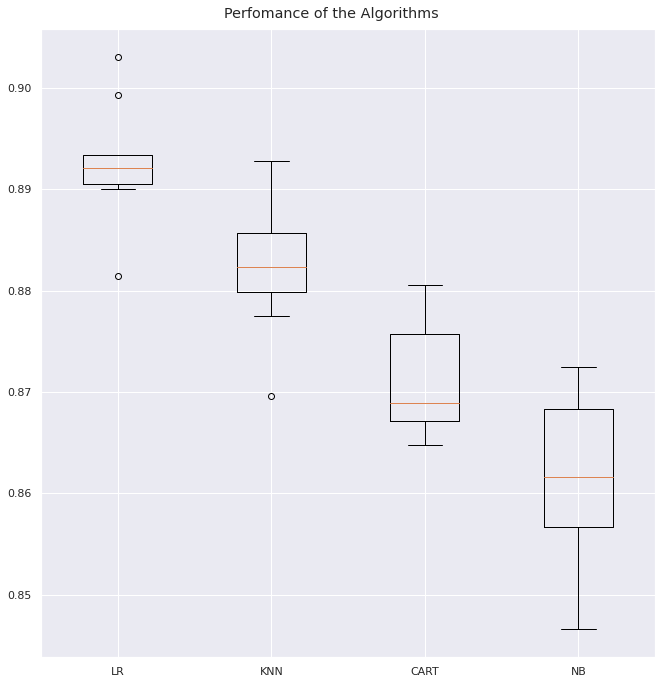

In [ ]:
# Plotting the performance of the algorithms
fig = plt.figure()
fig.suptitle('Perfomance of the Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.tight_layout(pad=3)
plt.show()

In [ ]:
#From the above graph, we see that Logictic Regression has the most CV score and the least variance, Therefore we will go ahead with LR

In [ ]:
#Predicting on the test set
model= LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Evaluating model performance
predictions = model.predict(X_test)
# Calculating accuracy Score 
print(accuracy_score(y_test, predictions))

0.8958922711327374


**We get 89% accuracy with NB algorithm**

In [ ]:
# Analyzing the Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7802
           1       0.64      0.26      0.36      1035

    accuracy                           0.90      8837
   macro avg       0.77      0.62      0.65      8837
weighted avg       0.88      0.90      0.88      8837



The model shows a precision score of 91% for '0', meaning that it predicts correctly everytime, when the customer says 'no'. Also, the F1- Score is 94%  indicates that the model correctly predicts everytime the customer says no.

##**Conclusion and Recommendations**

###The data shows that the following demographics have a higher subscription rate:

*Age group: < 30 or age > 60

*Occupation: Management or Retired people or Students

*Balance: > 5000 euros

Therefore, the bank will get more success on approaching customers belonging to the above categories. Also, the Logistic Regression model can be applied to know if the customer will or will not subscribe, before calling the customer. 

In this way, the bank can take a targeted approach and increase the efficiency in converting customers.